In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
root_dir = "/Users/michaeldoherty/git/XLRON/data/JOCN_SI/deeprmsa_train"

# Load files from same directory
for i in range(16):
    globals()[f"agent_{i}"] = pd.read_csv(f"{root_dir}/agent_{i}.csv")
    
dfs = [agent_0, agent_1, agent_2, agent_3, agent_4, agent_5, agent_6, agent_7, agent_8, agent_9, agent_10, agent_11, agent_12, agent_13, agent_14, agent_15]


In [13]:
# Get max length of all the dataframes
max_len = np.max([agent_0.shape[0], agent_1.shape[0], agent_2.shape[0], agent_3.shape[0], agent_4.shape[0], agent_5.shape[0], agent_6.shape[0], agent_7.shape[0], agent_8.shape[0], agent_9.shape[0], agent_10.shape[0], agent_11.shape[0], agent_12.shape[0], agent_13.shape[0], agent_14.shape[0], agent_15.shape[0]])
max_len

314

In [14]:
mean_bps = []
mean_utils = []
std_bps = []
std_utils = []
for i in range(max_len):
    bps = []
    utils = []
    for df in dfs:
        try:
            bp = df['bp'].iloc[i]
            util = df['util'].iloc[i]
        except:
            pass
        bps.append(bp)
        utils.append(util)
    mean_bp = np.mean(bps)
    mean_util = np.mean(utils)
    std_bp = np.std(bps)
    std_util = np.std(utils)
    mean_bps.append(mean_bp)
    mean_utils.append(mean_util)
    std_bps.append(std_bp)
    std_utils.append(std_util)

In [95]:
# Create new df withs means and stds
df = pd.DataFrame()
df['episode'] = [i for i in range(max_len)]
df['mean_bp'] = mean_bps
df['mean_util'] = mean_utils
df['std_bp'] = std_bps
df['std_util'] = std_utils
df['time'] = np.arange(1, max_len+1) * 7862 / (max_len)

In [96]:
df

,episode,mean_bp,mean_util,std_bp,std_util,time
0,0,0.497938,0.454601,0.019986,0.005907,25.038217
1,1,0.501688,0.452294,0.010740,0.007280,50.076433
2,2,0.494125,0.454986,0.018248,0.007899,75.114650
3,3,0.503625,0.454458,0.019384,0.007232,100.152866
4,4,0.488063,0.457674,0.020608,0.009912,125.191083
...,...,...,...,...,...,...
309,309,0.143500,0.500379,0.014353,0.013268,7761.847134
310,310,0.165625,0.500301,0.013624,0.008237,7786.885350
311,311,0.155938,0.491503,0.024656,0.008867,7811.923567
312,312,0.136313,0.487844,0.009425,0.006583,7836.961783


In [115]:
# Get XLRON training data
df_xlron = pd.read_csv(f"{root_dir}/deeprmsa_train_xlron_cpu16.csv")
df_xlron['episode'] = df_xlron["Unnamed: 0"]
df_xlron['time'] = df_xlron["lengths"] * 16 / 9100
df_xlron

,Unnamed: 0,accepted_services,accepted_services_std,accepted_bitrate,accepted_bitrate_std,service_blocking_probability,service_blocking_probability_std,bitrate_blocking_probability,bitrate_blocking_probability_std,total_bitrate,...,utilisation_mean,utilisation_std,returns,returns_std,cum_returns,cum_returns_std,lengths,lengths_std,episode,time
0,0,3264.0000,37.960506,186222.94,2926.5986,0.456000,0.006327,0.503785,0.007798,375287.00,...,0.444247,0.022631,0.0,0.0,528.000,75.921010,6000.0,0.0,0,10.549451
1,1,3988.4375,40.793640,228966.88,3216.7856,0.430223,0.005828,0.476340,0.007357,437243.70,...,0.410483,0.019544,0.0,0.0,976.875,81.587280,7000.0,0.0,1,12.307692
2,2,4781.5625,40.733845,276554.12,3345.4420,0.402305,0.005092,0.446441,0.006696,499592.80,...,0.399006,0.021425,0.0,0.0,1563.125,81.467690,8000.0,0.0,2,14.065934
3,3,5588.6250,36.556248,325088.56,2878.4585,0.379042,0.004062,0.421585,0.005122,562033.90,...,0.419190,0.018873,0.0,0.0,2177.250,73.112495,9000.0,0.0,3,15.824176
4,4,6413.1875,41.178300,374696.88,3241.9885,0.358681,0.004118,0.400048,0.005191,624545.06,...,0.430171,0.017738,0.0,0.0,2826.375,82.356600,10000.0,0.0,4,17.582418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,307,268390.9400,301.544250,16143859.00,20387.2360,0.142521,0.000963,0.174761,0.001042,19562644.00,...,0.485554,0.018547,0.0,0.0,223781.880,603.088500,313000.0,0.0,307,550.329670
308,308,269257.3000,309.201780,16196043.00,20576.1480,0.142493,0.000985,0.174733,0.001048,19625222.00,...,0.484119,0.024807,0.0,0.0,224514.620,618.403560,314000.0,0.0,308,552.087912
309,309,270128.8000,309.877440,16248540.00,20667.8120,0.142448,0.000984,0.174687,0.001050,19687736.00,...,0.480497,0.026553,0.0,0.0,225257.620,619.754900,315000.0,0.0,309,553.846154
310,310,270995.9400,307.374660,16300769.00,20225.2710,0.142418,0.000973,0.174651,0.001024,19750150.00,...,0.488054,0.019272,0.0,0.0,225991.880,614.749300,316000.0,0.0,310,555.604396


In [158]:
# Traing for JOCN_DEEPRMSA_8
df_xlron_1 = pd.read_csv(f"{root_dir}/deeprmsa_train_xlron_2000_masking.csv")
df_xlron_1['episode'] = df_xlron_1.index / 2000
df_xlron_1['time'] = np.arange(0, 550, 550/len(df_xlron_1))
print(df_xlron_1['episode'][len(df_xlron_1)-1])
df_xlron_2 = pd.read_csv(f"{root_dir}/deeprmsa_train_xlron_2000_masking_retrain.csv")
df_xlron_2['episode'] = (df_xlron_2.index / 2000) + df_xlron_1['episode'][len(df_xlron_1)-1]
df_xlron_2['time'] = np.arange(0, 1333, 1333/len(df_xlron_2)) + df_xlron_1['time'][len(df_xlron_1)-1] #df_xlron_2['episode'] * 2000 * 2 / 3.7e3
print(df_xlron_2['episode'][len(df_xlron_2)-1])
df_xlron_3 = pd.read_csv(f"{root_dir}/deeprmsa_train_xlron_2000_masking_retrain_8.csv")
df_xlron_3['episode'] = (df_xlron_3.index / 2000) + df_xlron_2['episode'][len(df_xlron_2)-1]
#df_xlron_3['time'] = df_xlron_3['episode'] * 2000 * 2 / 3.7e3
df_xlron_3['time'] = np.arange(0, 1333, 1333/len(df_xlron_3)) + df_xlron_2['time'][len(df_xlron_2)-1]
# Stack them
df_xlron_mask = pd.concat([df_xlron_1, df_xlron_2, df_xlron_3])
# Reset index
df_xlron_mask = df_xlron_mask.reset_index(drop=True)
#df_xlron_mask['episode'] = df_xlron_mask.index / 2400
#df_xlron_mask['time'] = df_xlron_mask['episode']*2000 / 3.7e5
df_xlron_mask

49.999
299.998


,Unnamed: 0,accepted_services,accepted_services_std,accepted_bitrate,accepted_bitrate_std,service_blocking_probability,service_blocking_probability_std,bitrate_blocking_probability,bitrate_blocking_probability_std,total_bitrate,...,utilisation_mean,utilisation_std,returns,returns_std,cum_returns,cum_returns_std,lengths,lengths_std,episode,time
0,0,4952.6846,42.897957,295508.80,3224.6280,0.174553,0.007150,0.211905,0.008600,374966.16,...,0.512385,0.023372,0.652,0.758219,3905.3691,85.795910,6000.0005,0.000488,0.0000,0.000000
1,1,5786.5903,45.926414,345329.75,3459.7690,0.173344,0.006561,0.210650,0.007908,437486.40,...,0.503764,0.022998,0.664,0.747733,4573.1800,91.852844,7000.0005,0.000488,0.0005,0.005500
2,2,6631.7460,49.126200,395949.40,3693.8308,0.171032,0.006141,0.208111,0.007388,500006.22,...,0.494140,0.024145,0.691,0.722855,5263.4920,98.252400,8000.0005,0.000488,0.0010,0.011000
3,3,7487.8090,52.111874,447334.97,3951.5862,0.168021,0.005790,0.204745,0.007025,562504.90,...,0.487350,0.025653,0.716,0.698100,5975.6170,104.223750,9000.0000,0.000000,0.0015,0.016500
4,4,8348.4660,54.828953,499071.38,4146.0120,0.165153,0.005483,0.201492,0.006634,625005.10,...,0.483780,0.025030,0.749,0.662570,6696.9300,109.657900,10000.0000,0.000000,0.0020,0.022000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099992,499994,236981.2500,325.024260,14315037.00,25162.6860,0.122292,0.001204,0.151717,0.001491,16875308.00,...,0.481453,0.025209,0.773,0.634406,203962.4700,650.048650,270000.0000,0.000000,549.9950,3215.978504
1099993,499995,236981.2500,325.024260,14315037.00,25162.6860,0.122292,0.001204,0.151717,0.001491,16875308.00,...,0.481453,0.025209,0.773,0.634406,203962.4700,650.048650,270000.0000,0.000000,549.9955,3215.981170
1099994,499996,236981.2500,325.024260,14315037.00,25162.6860,0.122292,0.001204,0.151717,0.001491,16875308.00,...,0.481453,0.025209,0.773,0.634406,203962.4700,650.048650,270000.0000,0.000000,549.9960,3215.983836
1099995,499997,236981.2500,325.024260,14315037.00,25162.6860,0.122292,0.001204,0.151717,0.001491,16875308.00,...,0.481453,0.025209,0.773,0.634406,203962.4700,650.048650,270000.0000,0.000000,549.9965,3215.986502


In [159]:
df_kspff_10 = pd.read_csv(f"{root_dir}/deeprmsa_kspff_10.csv")
df_kspff_10['episode'] = df_kspff_10.index / 16
df_kspff_10['time'] = (df_kspff_10.index + 1) * 7862 / len(df_kspff_10)
df_kspff_10

,Unnamed: 0,accepted_services,accepted_services_std,accepted_bitrate,accepted_bitrate_std,service_blocking_probability,service_blocking_probability_std,bitrate_blocking_probability,bitrate_blocking_probability_std,total_bitrate,...,utilisation_mean,utilisation_std,returns,returns_std,cum_returns,cum_returns_std,lengths,lengths_std,episode,time
0,0,5289.0000,35.763110,319505.62,2655.5286,0.118500,0.005961,0.147258,0.007087,374680.50,...,0.478906,0.023503,1.000,0.000000,4578.000,71.52622,6000.0,0.0,0.0000,1.572715
1,1,6163.8125,44.595710,372421.80,3457.8313,0.119455,0.006371,0.148516,0.007906,437379.94,...,0.473168,0.025254,0.750,0.661438,5327.625,89.19142,7000.0,0.0,0.0625,3.145429
2,2,7036.6250,46.951940,425182.94,3730.7893,0.120422,0.005869,0.149651,0.007461,500009.75,...,0.476733,0.029591,0.750,0.661438,6073.250,93.90388,8000.0,0.0,0.1250,4.718144
3,3,7908.5000,49.066280,477488.20,3897.7480,0.121278,0.005452,0.150754,0.006932,562249.75,...,0.482756,0.023254,0.750,0.661438,6817.000,98.13256,9000.0,0.0,0.1875,6.290858
4,4,8777.5625,49.155327,529749.40,4152.0986,0.122244,0.004916,0.151900,0.006647,624630.75,...,0.472656,0.017994,0.625,0.780625,7555.125,98.31065,10000.0,0.0,0.2500,7.863573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4994,277271.6200,410.806980,16726338.00,30292.2640,0.125326,0.001296,0.155587,0.001529,19808254.00,...,0.474403,0.025302,0.875,0.484123,237543.250,821.61395,317000.0,0.0,312.1250,7855.709142
4995,4995,277271.6200,410.806980,16726338.00,30292.2640,0.125326,0.001296,0.155587,0.001529,19808254.00,...,0.474403,0.025302,0.875,0.484123,237543.250,821.61395,317000.0,0.0,312.1875,7857.281856
4996,4996,277271.6200,410.806980,16726338.00,30292.2640,0.125326,0.001296,0.155587,0.001529,19808254.00,...,0.474403,0.025302,0.875,0.484123,237543.250,821.61395,317000.0,0.0,312.2500,7858.854571
4997,4997,277271.6200,410.806980,16726338.00,30292.2640,0.125326,0.001296,0.155587,0.001529,19808254.00,...,0.474403,0.025302,0.875,0.484123,237543.250,821.61395,317000.0,0.0,312.3125,7860.427285


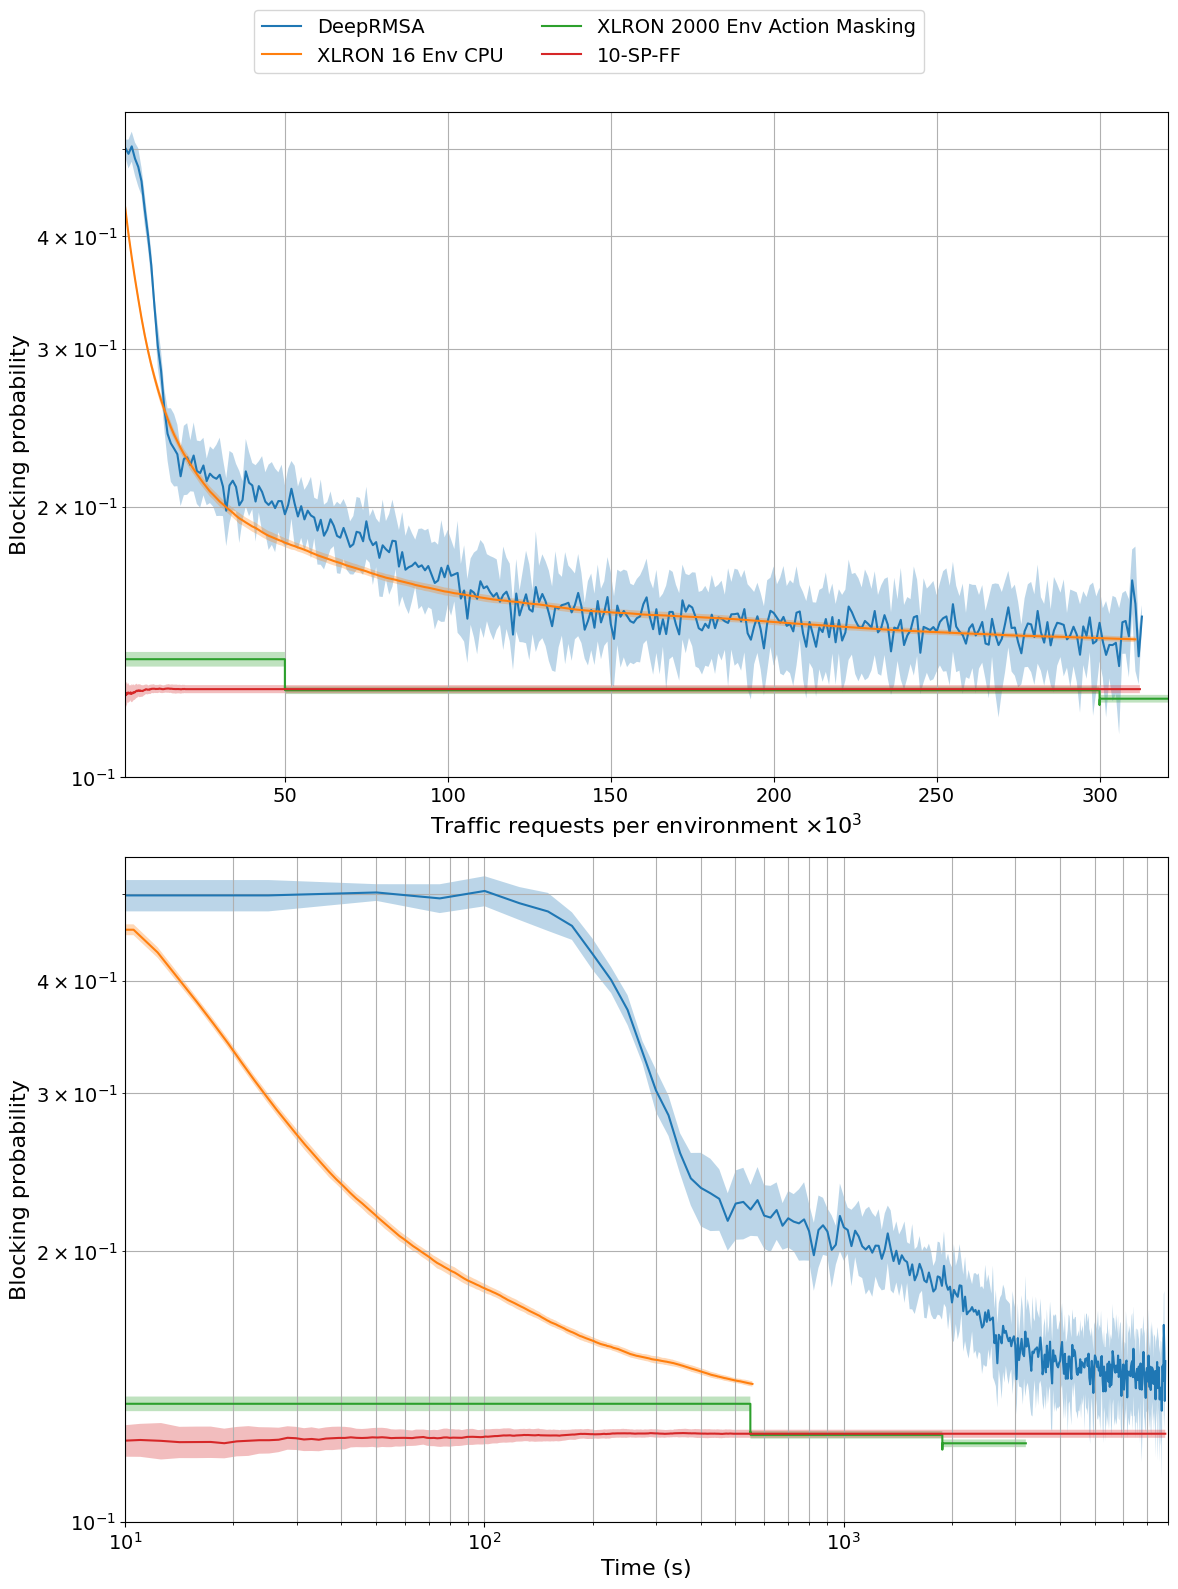

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatter, LogLocator, ScalarFormatter

# Assuming df and df_xlron are already defined

# Add additional row to df
new_row_df = df.iloc[0].copy()
new_row_df['episode'] = 0
new_row_df['time'] = 0
df = pd.concat([pd.DataFrame([new_row_df]), df]).reset_index(drop=True)

# Add additional row to df_xlron
new_row_df_xlron = df_xlron.iloc[0].copy()
new_row_df_xlron['episode'] = 0
new_row_df_xlron['time'] = 0
df_xlron = pd.concat([pd.DataFrame([new_row_df_xlron]), df_xlron]).reset_index(drop=True)

# Add additional row to df_xlron_mask
new_row_df_xlron_mask = df_xlron_mask.iloc[0].copy()
new_row_df_xlron_mask['episode'] = 0
new_row_df_xlron_mask['time'] = 0
df_xlron_mask = pd.concat([pd.DataFrame([new_row_df_xlron_mask]), df_xlron_mask]).reset_index(drop=True)

# Add additional row to df_kspff_10
new_row_df_kspff_10 = df_kspff_10.iloc[0].copy()
new_row_df_kspff_10['episode'] = 0
new_row_df_kspff_10['time'] = 0
df_kspff_10 = pd.concat([pd.DataFrame([new_row_df_kspff_10]), df_kspff_10]).reset_index(drop=True)

# Increase the default font size
plt.rcParams.update({'font.size': 14})

# Create vertical subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16), sharex=False)
# Custom formatter function
def custom_formatter(x, pos):
    if x >= 0.01:
        return f'{x:.2f}'
    else:
        return f'{x:.2f}'

# Set up the y-axis for ax1
ax1.yaxis.set_major_locator(LogLocator(numticks=6))
ax1.yaxis.set_minor_locator(LogLocator(subs='all', numticks=12))
ax1.yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))
ax1.yaxis.set_major_formatter(ScalarFormatter())
ax1.tick_params(axis='both', which='major', labelsize=14)

# Plot BP vs Episode
line1, = ax1.plot(df['episode'], df['mean_bp'], label='DeepRMSA')
line2, = ax1.plot(df_xlron['episode'], df_xlron["service_blocking_probability"], label="XLRON 16 Env CPU")
line3, = ax1.plot(df_xlron_mask['episode'], df_xlron_mask["service_blocking_probability"], label="XLRON Masking")
line4, = ax1.plot(df_kspff_10['episode'], df_kspff_10["service_blocking_probability"], label="10-SP-FF")
ax1.fill_between(df['episode'], df['mean_bp'] - df['std_bp'], df['mean_bp'] + df['std_bp'], alpha=0.3)
ax1.fill_between(df_xlron['episode'], df_xlron['service_blocking_probability'] - df_xlron['service_blocking_probability_std'], df_xlron['service_blocking_probability'] + df_xlron['service_blocking_probability_std'], alpha=0.3)
ax1.fill_between(df_xlron_mask['episode'], df_xlron_mask['service_blocking_probability'] - df_xlron_mask['service_blocking_probability_std'], df_xlron_mask['service_blocking_probability'] + df_xlron_mask['service_blocking_probability_std'], alpha=0.3)
ax1.fill_between(df_kspff_10['episode'], df_kspff_10['service_blocking_probability'] - df_kspff_10['service_blocking_probability_std'], df_kspff_10['service_blocking_probability'] + df_kspff_10['service_blocking_probability_std'], alpha=0.3)
ax1.set_xlabel('Traffic requests per environment $\\times 10^3$', fontsize=16)
ax1.set_ylabel('Blocking probability', fontsize=16)
ax1.grid(which='both')
ax1.set_yscale('log')
ax1.set_ylim(0.1,0.55)
ax1.set_xlim(1, len(df))


# Set up the y-axis for ax2
ax2.yaxis.set_major_locator(LogLocator(numticks=6))
ax2.yaxis.set_minor_locator(LogLocator(subs='all', numticks=12))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))
ax2.yaxis.set_major_formatter(ScalarFormatter())
ax2.tick_params(axis='both', which='major', labelsize=14)
# Plot BP vs Time
ax2.plot(df['time'], df['mean_bp'], label='DeepRMSA')
ax2.plot(df_xlron['time'], df_xlron["service_blocking_probability"], label="XLRON 16 Env CPU")
ax2.plot(df_xlron_mask['time'], df_xlron_mask["service_blocking_probability"], label="XLRON 2000 Env Action Masking")
ax2.plot(df_kspff_10['time'], df_kspff_10["service_blocking_probability"], label="10-SP-FF")
ax2.fill_between(df['time'], df['mean_bp'] - df['std_bp'], df['mean_bp'] + df['std_bp'], alpha=0.3)
ax2.fill_between(df_xlron['time'], df_xlron['service_blocking_probability'] - df_xlron['service_blocking_probability_std'], df_xlron['service_blocking_probability'] + df_xlron['service_blocking_probability_std'], alpha=0.3)
ax2.fill_between(df_xlron_mask['time'], df_xlron_mask['service_blocking_probability'] - df_xlron_mask['service_blocking_probability_std'], df_xlron_mask['service_blocking_probability'] + df_xlron_mask['service_blocking_probability_std'], alpha=0.3)
ax2.fill_between(df_kspff_10['time'], df_kspff_10['service_blocking_probability'] - df_kspff_10['service_blocking_probability_std'], df_kspff_10['service_blocking_probability'] + df_kspff_10['service_blocking_probability_std'], alpha=0.3)
ax2.set_xlabel('Time (s)', fontsize=16)
ax2.set_xscale('log')
ax2.set_ylabel('Blocking probability', fontsize=16)
ax2.grid(which='both')
ax2.set_yscale('log')
ax2.set_ylim(0.1,0.55)
ax2.set_xlim(10, 8000)  # Changed lower limit to 10 for log scale

# Add a single legend
fig.legend([line1, line2, line3, line4], ['DeepRMSA', 'XLRON 16 Env CPU', 'XLRON 2000 Env Action Masking', '10-SP-FF'], loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=2, fontsize=14)

plt.tight_layout()
# Adjust the layout to make room for the legend
plt.subplots_adjust(top=0.93)
plt.show()